In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#----------------------
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk import word_tokenize, sent_tokenize, ngrams, pos_tag, RegexpParser
from collections import Counter
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import confusion_matrix,precision_score
import warnings
warnings.filterwarnings('ignore')

In [6]:
def cleanEmail(Email:str):
    Email = re.sub(r'<.*?>', ' ', Email)  # Remove HTML tags
    Email = re.sub(r'\S+@\S+', ' ', Email)  # Remove email addresses
    Email = re.sub(r'(http|www|com)', ' ', Email)  # Remove URLs
    Email = re.sub(r'[^a-zA-Z\s]', ' ', Email)  # Remove special characters
    Email = re.sub(r'[0-9]',' ',Email)
    Email = re.sub('#\S+', ' ', Email)  # remove hashtags
    Email = re.sub('@\S+', ' ', Email)  # remove mentions
    Email = re.sub(r' ?\'\s?[t]','\'t',Email)
    Email = re.sub(r' ?\'\s?[s]','\'s',Email)
    Email = re.sub(r'[iI]\s?\'\s?[m]','i\'m',Email)
    Email = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', Email)  # remove punctuations
    Email = re.sub(r'[^\x00-\x7f]',r' ', Email)

    
    
    
    # Tokenization and lowercasing
    tokens = Email.lower()
    
    
    #Stopword removal
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens.split(' ') if token not in stop_words]

    #lemmatizer
    lemmatizer = WordNetLemmatizer()
    lematiz_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    Email = ' '.join(lematiz_tokens)
    
    
    Email = re.sub(r' [A-z] ',' ',Email)
    Email = re.sub('\s+', ' ', Email)  # remove extra whitespace
    return Email
    

In [7]:
train = pd.read_csv('Train_set.csv').iloc[:,1:]
test = pd.read_csv('Test_set.csv').iloc[:,1:]
test['Label'] = 'test'
df = pd.concat([train.copy(),test.copy()],ignore_index=True)

In [8]:
df['Body'] = df.Body.apply(lambda x:cleanEmail(x))

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer 

tfidfmodel = TfidfVectorizer(max_features =4000 ,
                         max_df=.7,
                            min_df=500,
                            ngram_range=(1,3))

train_tf_idf = tfidfmodel.fit_transform(df['Body'])
t_features = pd.DataFrame(train_tf_idf.toarray(), columns=tfidfmodel.get_feature_names_out())


In [6]:
t_features

,aa,ab,abil,ability,abl,able,about,above,absence,absolutely,...,young,your,yr,zdnet,zero,zimin,zimin lu,zimin lu hou,zip,zone
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.155632,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18786,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18787,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18788,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18789,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=2, batch_size=66, random_state=42, n_init='auto')

kmeans.fit(pd.DataFrame(t_features.iloc[:train.shape[0],:]))

cluster_assignments = kmeans.predict(pd.DataFrame(t_features.iloc[:train.shape[0],:]))

In [11]:
y=train['Label'].values
print(confusion_matrix(y,cluster_assignments))
print("Precision : ", precision_score(y,cluster_assignments,average=None))

[[3886 4514]
 [   9 4744]]
Precision :  [0.99768935 0.51242169]


In [9]:
test_f = train_features.iloc[df[df.Label == 'test'].index,:]

In [10]:
result = kmeans.predict(test_f)
submition = pd.read_csv("sample_submition3.csv")
submition['Label'] = result

In [11]:
submition.to_csv("submitNew.csv",index=False)

In [14]:
def gen(batch):
    kmeans = MiniBatchKMeans(n_clusters=2, batch_size=batch)

    # Fit the model to your selected features
    kmeans.fit(pd.DataFrame(t_features.iloc[:train.shape[0],:]))

    # Predict cluster assignments for the data points
    cluster_assignments = kmeans.predict(pd.DataFrame(t_features.iloc[:train.shape[0],:]))
    print("Precision {} : ".format(batch), precision_score(y,cluster_assignments,average=None))
for n in range(21,60):
    gen(n)

Precision 21 :  [0.58643802 0.0012012 ]
Precision 22 :  [0.63852764 0.        ]
Precision 23 :  [0.57320417 0.03753957]
Precision 24 :  [0.61628791 0.16033435]
Precision 25 :  [0.99927378 0.40353261]
Precision 26 :  [5.79617834e-01 5.40832883e-04]
Precision 27 :  [0.99718442 0.43068409]
Precision 28 :  [0.85051958 0.383633  ]
Precision 29 :  [0.90239155 0.67958396]
Precision 30 :  [0.99903101 0.4284426 ]
Precision 31 :  [0.56768082 0.00321839]
Precision 32 :  [0.65399002 0.97507788]
Precision 33 :  [0.99943789 0.41779497]
Precision 34 :  [0.99942029 0.41582079]
Precision 35 :  [0.5951955  0.00070721]
Precision 36 :  [0.99903241 0.42855854]
Precision 37 :  [0.61579709 0.17022792]
Precision 38 :  [0.99754782 0.52264463]
Precision 39 :  [0.04562738 0.3235199 ]
Precision 40 :  [0.84150077 0.38372584]
Precision 41 :  [0.59557447 0.00071276]
Precision 42 :  [0.8345481  0.38417791]
Precision 43 :  [0.84186402 0.38382303]
Precision 44 :  [0.58240309 0.00112613]
Precision 45 :  [0.49010989 0.02

Precision 60:  [0.57862528 0.00106496]
Precision 61:  [0.99680365 0.4329107 ]
Precision 62:  [0.61564017 0.17043847]
Precision 63:  [0.61636656 0.16238671]
Precision 64:  [0.95151727 0.44857087]
Precision 65:  [0.61670326 0.16323417]
Precision 66:  [0.54739653 0.00262467]
Precision 67:  [0.6347218 0.       ]
Precision 68:  [0.83826879 0.38357553]
Precision 69:  [0.99750978 0.45890543]
Precision 70:  [0.63852764 0.        ]
Precision 71:  [0.57470235 0.00100908]
Precision 72:  [0.99945799 0.42023346]
Precision 73:  [0.57648422 0.00103359]
Precision 74:  [0.43966434 0.00255754]
Precision 75:  [0.43023632 0.29739666]
Precision 76:  [0.99698536 0.43818669]
Precision 77:  [0.99855002 0.42854565]
Precision 78:  [0.56522536 0.00312919]
Precision 79:  [0.99775393 0.5186967 ]


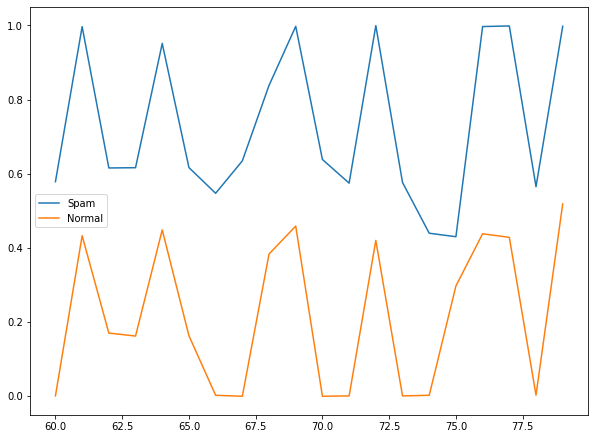

In [18]:
def gen(batch):
    kmeans = MiniBatchKMeans(n_clusters=2, batch_size=batch)

    # Fit the model to your selected features
    kmeans.fit(pd.DataFrame(t_features.iloc[:train.shape[0],:]))

    # Predict cluster assignments for the data points
    cluster_assignments = kmeans.predict(pd.DataFrame(t_features.iloc[:train.shape[0],:]))
    X = precision_score(y,cluster_assignments,average=None)
    print("Precision {}: ".format(batch), X)
    return X
d = []
c= []
for n in range(60,80):
    f = gen(n)
    d.append(f[0])
    c.append(f[1])
plt.figure(figsize=(10,7.5))
plt.plot(range(60,80),d,label = 'Spam')
plt.plot(range(60,80),c,label = 'Normal')
plt.legend()

In [33]:
from sklearn.cluster import KMeans
true_k = 2
model = KMeans(n_clusters=2, max_iter=300, n_init='auto')
model.fit(train_features.iloc[:train.shape[0],:].values)
pred = model.predict(train_features.iloc[:train.shape[0],:].values)
from sklearn.metrics import confusion_matrix
confusion_matrix(train.Label.values,pred)

array([[7106, 1294],
       [4753,    0]], dtype=int64)